# Analysis of the results of PSO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# @author: Íñigo Martínez Jiménez
# We asign the dataframe to a variable
dataframe = pd.read_csv('./dataframe.csv')

In [3]:
# @author: Íñigo Martínez Jiménez
# We show the head of the dataframe to see the variables
dataframe.head()

,particles,omega,phip,phig,max_iter,Best solution,Fitness value
0,15,0.45,1.5,1.50,5,[18.20296068 31.63299189],61.658333
1,15,0.45,1.5,1.50,10,[20. 40.],61.000000
2,15,0.45,1.5,1.75,5,[20. 37.87960002],57.000000
3,15,0.45,1.5,1.75,10,[20. 40.],57.000000
4,15,0.45,1.5,2.00,5,[20. 39.61600058],63.000000


In [4]:
# @author: Íñigo Martínez Jiménez
# This show us the main common operations that we could do in a dataframe such like the mean or the standard desviation
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
particles,72.0,20.000000,5.035088,15.000000,15.00,20.00,25.00,25.00
omega,72.0,0.600000,0.151053,0.450000,0.45,0.60,0.75,0.75
phip,72.0,1.750000,0.205557,1.500000,1.50,1.75,2.00,2.00
phig,72.0,1.750000,0.205557,1.500000,1.50,1.75,2.00,2.00
max_iter,72.0,7.500000,2.517544,5.000000,5.00,7.50,10.00,10.00
Fitness value,72.0,63.624209,5.592881,48.763174,59.00,63.00,67.00,78.00


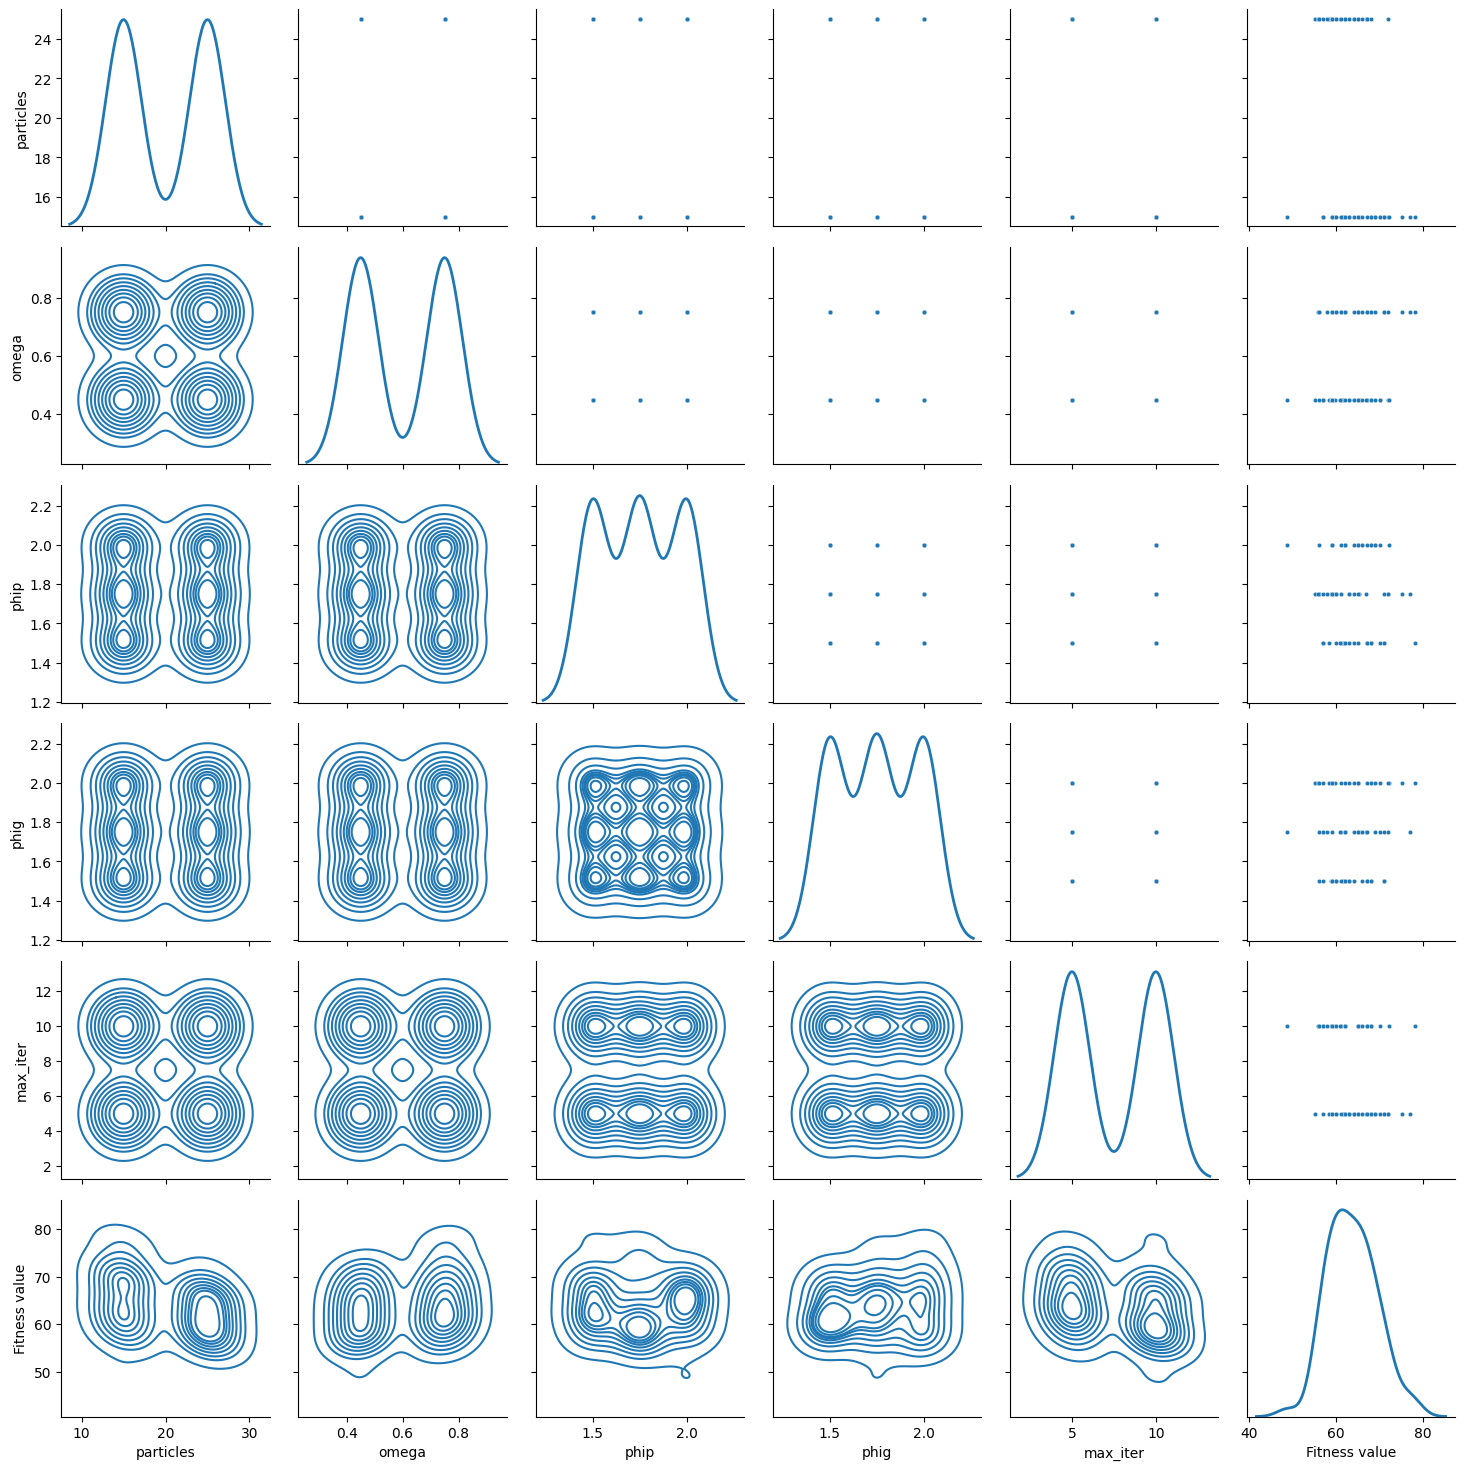

In [5]:
# @author: Íñigo Martínez Jiménez
# To explore the diferent relations of the variables, we use a pair plot
g = sns.PairGrid(dataframe, diag_sharey=False)
g.map_upper(sns.scatterplot, s=10)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

Looking at this graph, we could say that some variables like 'particles' and 'fitness value' are related, while some others like 'omega' and 'phip' do not show a clear pattern.

<Axes: >

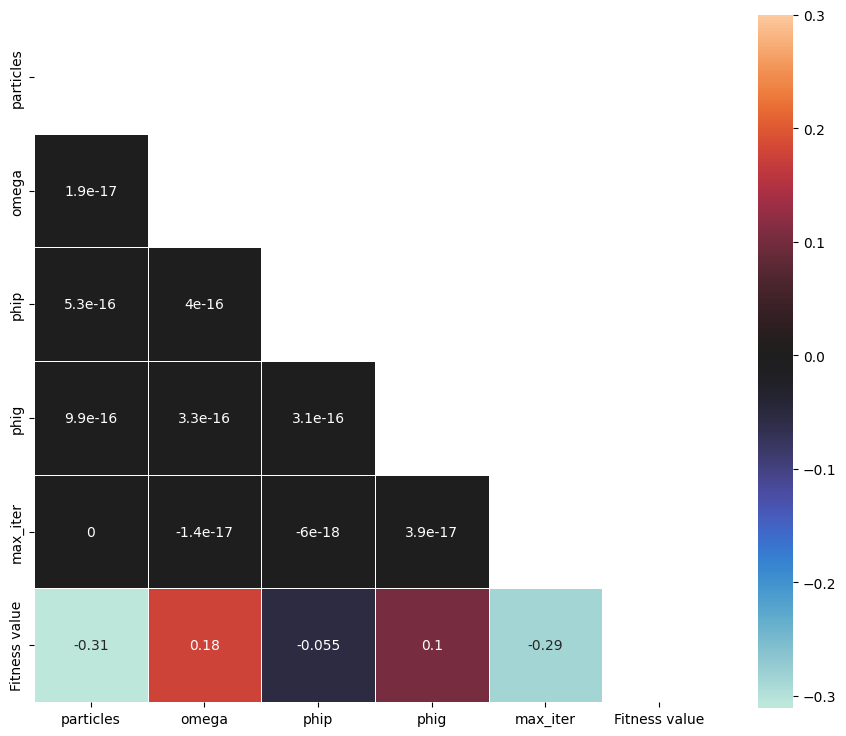

In [6]:
# @author: Íñigo Martínez Jiménez
# To explore the diferent relations of the correlation coeficents, we use correlation heat map
corr = dataframe.loc[:, ~dataframe.columns.isin(['Best solution', 'fitness'])].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5)

In a first run of this graph, we saw that ‘max_iter’ did not have much influence, while ‘particles’ and ‘omega’ showed more relevant correlations with ‘fitness value’, so we decided to add more combinations to those parameters.

In [7]:
# @author: Íñigo Martínez Jiménez
# We show how Fitness Value is correlated with the other variables
corr.loc['Fitness value']

particles       -0.310434
omega            0.176475
phip            -0.055208
phig             0.103210
max_iter        -0.285870
Fitness value    1.000000
Name: Fitness value, dtype: float64

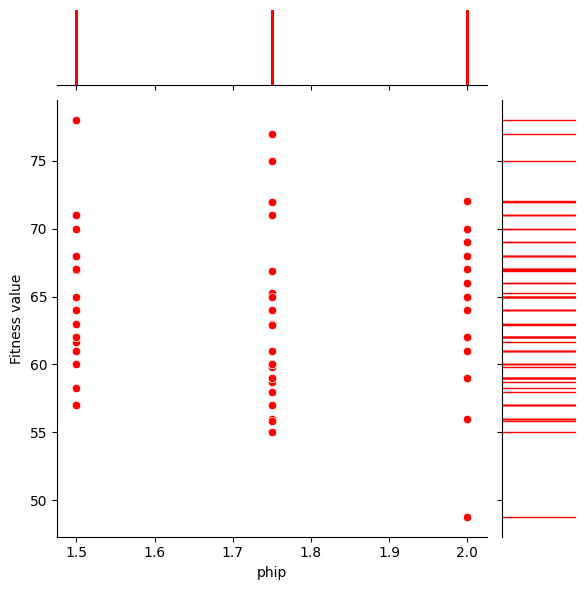

In [8]:
# @author: Íñigo Martínez Jiménez
# We use a scatter plot to see the relation with the variables phip and Fitness Value
g = sns.JointGrid(data=dataframe[['phip', 'Fitness value']], x="phip", y="Fitness value")
g.plot_joint(sns.scatterplot,
             color="red")
g.plot_marginals(sns.rugplot, height=1, color="red")

Phip values seem to be clustered in certain groups and, within these groups, “Fitness Value” values seem to vary quite a lot.

<Axes: xlabel='Fitness value', ylabel='phig'>

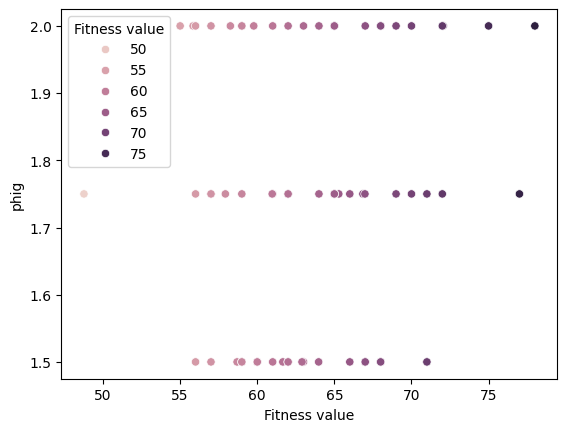

In [9]:
# @author: Íñigo Martínez Jiménez
# We use another scatter plot to see the relation with the variables phig and Fitness Value
sns.scatterplot(x = "Fitness value",
                y = "phig",
                hue ="Fitness value",
                data = dataframe[['phig', 'Fitness value']])

On the other hand, this other graph shows that the ‘phig’ values are in specific groups and, within those groups, the ‘Fitness Value’ can vary, but seems to increase slightly with phig

## Number of particles


In [10]:
# @author: Íñigo Martínez Jiménez
dataframe.groupby('particles').min()['Fitness value']

particles
15    48.763174
25    55.000000
Name: Fitness value, dtype: float64

Looking at this, we can say that as the number of particles increases, the minimum value of Fitness Value improves.

## PHIP Parameter

In [11]:
# @author: Íñigo Martínez Jiménez
dataframe.groupby('phip').min()['Fitness value']

phip
1.50    57.000000
1.75    55.000000
2.00    48.763174
Name: Fitness value, dtype: float64

Looking at this, we can say that lower values of ‘phip’ are related to a better minimum value of ‘Fitness Value’, while on the other hand higher values tend to worsen this value

## PHIG Parameter

In [12]:
# @author: Íñigo Martínez Jiménez
dataframe.groupby('phig').min()['Fitness value']

phig
1.50    56.000000
1.75    48.763174
2.00    55.000000
Name: Fitness value, dtype: float64

Looking at this, we can say that an intermediate value of ‘phig’ results in a better ‘Fitness Value’, while higher or lower values tend to worsen the fitness score. Surprisingly, this indicates that there is a fairly optimal balance for this parameter

## Better solutions

### Best of all the scenarios

In [13]:
# @author: Íñigo Martínez Jiménez
dataframe[dataframe["Fitness value"] == dataframe["Fitness value"].min()].sort_values('Fitness value', ascending=True)

,particles,omega,phip,phig,max_iter,Best solution,Fitness value
15,15,0.45,2.0,1.75,10,[18.7759714 39.13759344],48.763174


This was the best solution that we could find

### Top ten solutions

In [14]:
# @author: Íñigo Martínez Jiménez
dataframe.sort_values('Fitness value', ascending=True).iloc[:10,:]

,particles,omega,phip,phig,max_iter,Best solution,Fitness value
15,15,0.45,2.00,1.75,10,[18.7759714 39.13759344],48.763174
46,25,0.45,1.75,2.00,5,[20. 38.47671496],55.000000
65,25,0.75,1.75,2.00,10,[19.18562119 39.88170897],55.840581
45,25,0.45,1.75,1.75,10,[20. 31.17481634],56.000000
71,25,0.75,2.00,2.00,10,[20. 40.],56.000000
61,25,0.75,1.75,1.50,10,[20. 40.],56.000000
41,25,0.45,1.50,2.00,10,[20. 31.78896736],57.000000
3,15,0.45,1.50,1.75,10,[20. 40.],57.000000
7,15,0.45,1.75,1.50,10,[20. 34.98421091],57.000000
2,15,0.45,1.50,1.75,5,[20. 37.87960002],57.000000


In summary, once all this analysis is done, we can see that the top 10 solutions are spread across similar parameter combinations, with ‘phip’ and ‘phig’ varying slightly and ‘omega’ being mostly stable. This indicates that these same values can have a significant impact on the quality of the fitness value, not to mention the other parameters such as ‘particles’ or ‘max_iter’